# カロリーコスパ

摂取エネルギー量に対してコスパがいいかどうかを分析してみる

---- 

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
matplotlib.style.use('ggplot')

## 利用するデータについて

こんな感じ。

In [2]:
foods_df = pd.read_csv('./food-data.csv')
foods_df.head(10)

,food_name,store_type,calorie_k,price_yen,food_type
0,スペシャルビッグフランク,コンビニ,332,154,スナック
1,ビッグアメリカンドッグ,コンビニ,319,108,スナック
2,からあげ棒（竜田揚げ）,コンビニ,205,123,スナック
3,ジューシー若鶏ザンギ,コンビニ,78,50,スナック


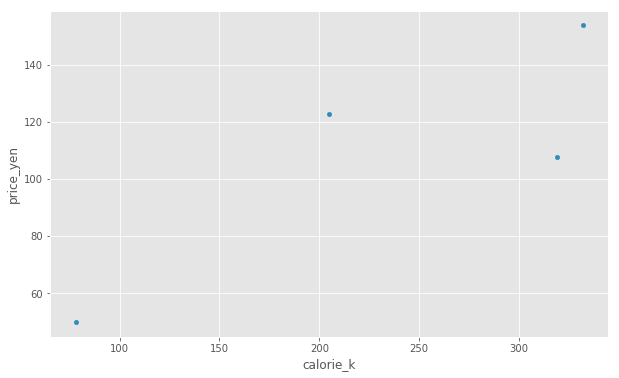

In [3]:
plt.clf()
foods_df.plot(kind='scatter', x='calorie_k', y='price_yen', figsize=(10,6))
plt.show()

## クラスタリングなんぞしてみる

３グループぐらいにわけてみよう。


In [4]:
arr = np.array([
    foods_df['calorie_k'].fillna(0).tolist(),
    foods_df['price_yen'].fillna(0).tolist(),
]).T
km = KMeans(n_clusters=3)
foods_df['cluster'] = km.fit_predict(arr)

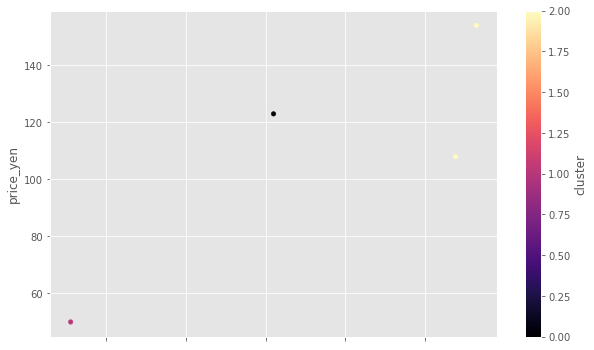

In [5]:
plt.clf()
foods_df.plot(kind='scatter', x='calorie_k', y='price_yen', figsize=(10,6), c='cluster', cmap='magma')
plt.show()